In [27]:
from DataUtils import *
import pandas as pd
import matplotlib.pyplot as plt

labels = ['text','isFake']

# Reading data set
    # Two Datasets
        1. Kaggle
        2. Reserach Articles News
    # Drop irrelevant columns

In [28]:
kaggle_data = getKaggleNewsDataSet()
print(kaggle_data.head())

research_data = getReserachArticleNewsDataSet()
research_data.head()

                                               title  \
0  At Trump rally, West Virginia governor switche...   
1  Syrian political opposition says hopes Clinton...   
2  Putin and Erdogan to use meeting next week to ...   
3  MIC DROP MOMENT: Veteran Senator Asked By A Te...   
4   WATCH: Fox Host Jeanine Pirro Just DESTROYED ...   

                                                text          subject  \
0  HUNTINGTON, W.Va. (Reuters) - West Virginia Go...     politicsNews   
1  GENEVA (Reuters) - Syria’s political oppositio...     politicsNews   
2  MOSCOW (Reuters) - Russian President Vladimir ...        worldnews   
3  When President Donald Trump visited the CIA Sa...  Government News   
4  The folks at Fox News are getting crazier on a...             News   

                 date  isFake  
0     August 3, 2017        0  
1   October 31, 2016        0  
2  November 10, 2017        0  
3        Jan 23, 2017       1  
4      April 10, 2016       1  


,text,isFake
0,"1 of 14 Chris George, a federal employee fu...",0
1,Following an ISIS chemical weapons attack i...,1
2,President Trump said he never told Michael ...,1
3,Nepalese journalists could face up to three ...,0
4,A newly discovered FaceTime bug lets people...,0


# Visualizing data set

## Kaggle : How many articles per subject?

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


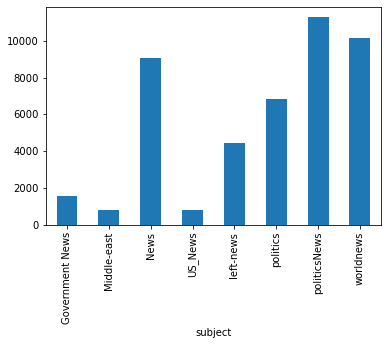

In [29]:
print(kaggle_data.groupby(['subject'])['text'].count())
kaggle_data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

## Kaggle : How many fake and real articles?

isFake
0    21417
1    23481
Name: text, dtype: int64


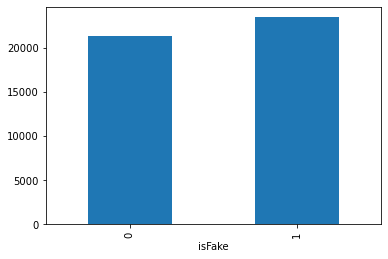

In [30]:
print(kaggle_data.groupby(['isFake'])['text'].count())
kaggle_data.groupby(['isFake'])['text'].count().plot(kind="bar")
plt.show()

## Research Article News : How many fake and real articles?

isFake
0    80
1    90
Name: text, dtype: int64


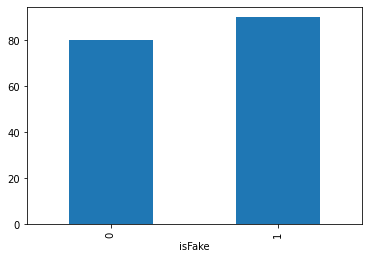

In [31]:
print(research_data.groupby(['isFake'])['text'].count())
research_data.groupby(['isFake'])['text'].count().plot(kind="bar")
plt.show()

## GET TEXT COLUMNS DF

In [32]:
kaggle_fake=kaggle_data[kaggle_data["isFake"]==1]
kaggle_real=kaggle_data[kaggle_data["isFake"]==0]

research_fake=research_data[research_data["isFake"]==1]
research_real=research_data[research_data["isFake"]==0]

## Kaggel : Word Cloud

### Fake

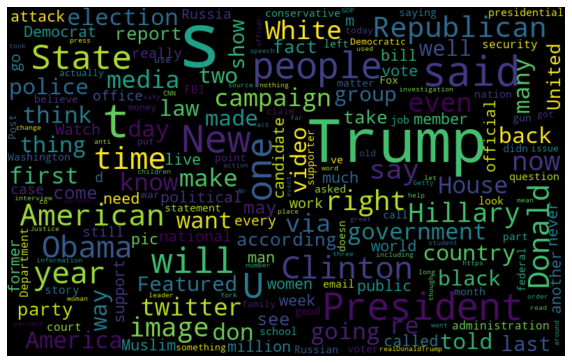

In [33]:
word_cloud(kaggle_fake, "text")

### Real

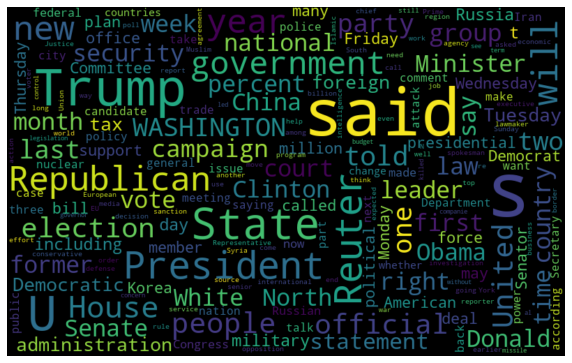

In [34]:
word_cloud(kaggle_real, "text")

## Research News : Word Cloud

### Fake

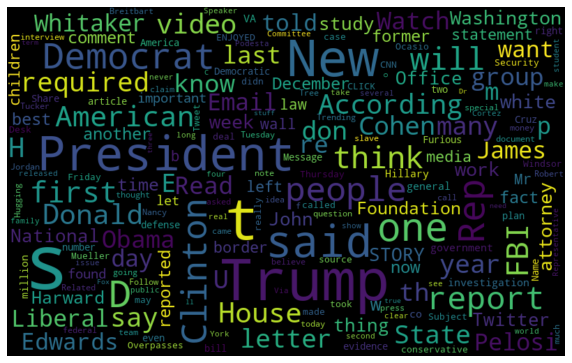

In [35]:
word_cloud(research_fake, "text")

### Real

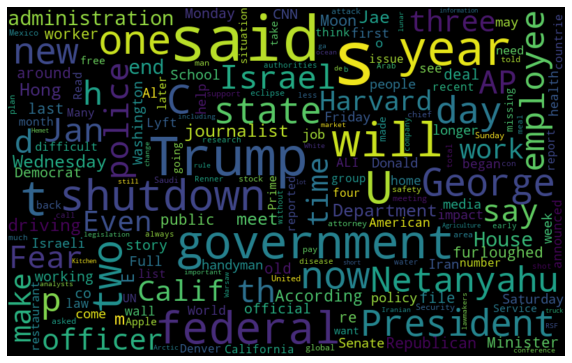

In [36]:
word_cloud(research_real, "text")

## Kaggel Word counts and frequency

### Fake

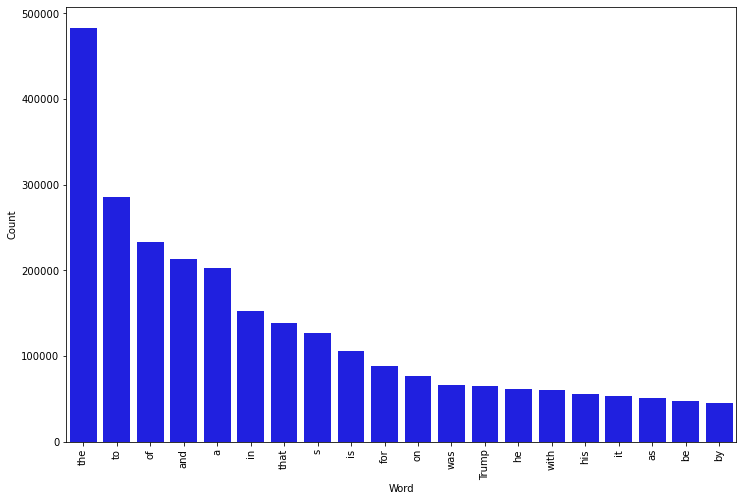

In [37]:
frequency(kaggle_fake, "text", 20)

### Real

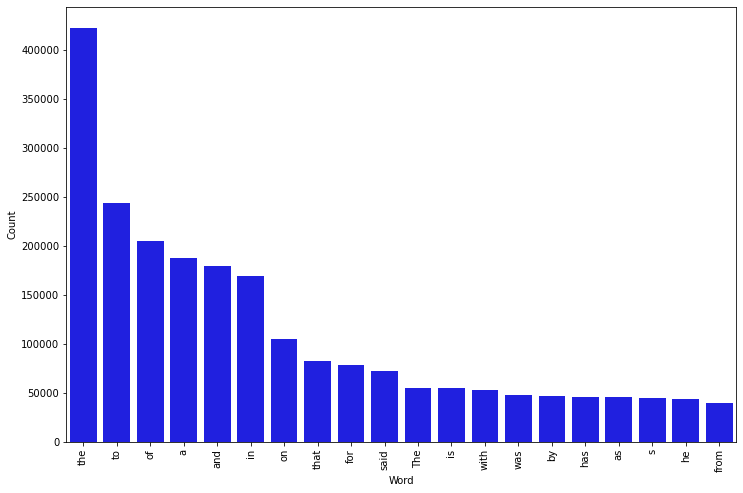

In [38]:
frequency(kaggle_real, "text", 20)

## Research Word counts and frequency

### Fake

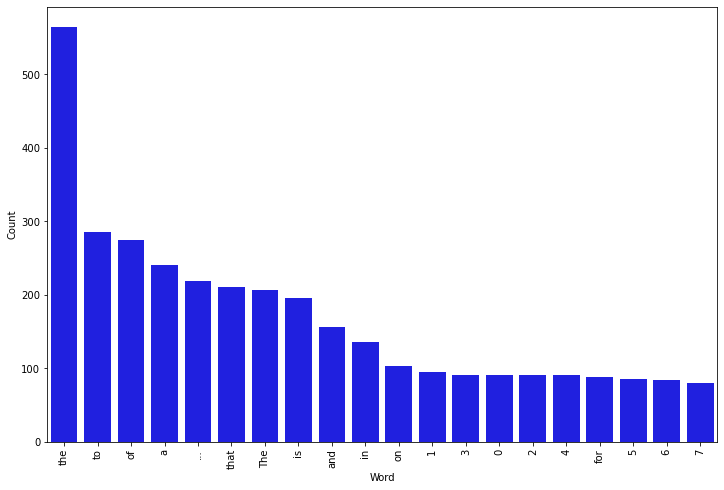

In [39]:
frequency(research_fake, "text", 20)

### Real

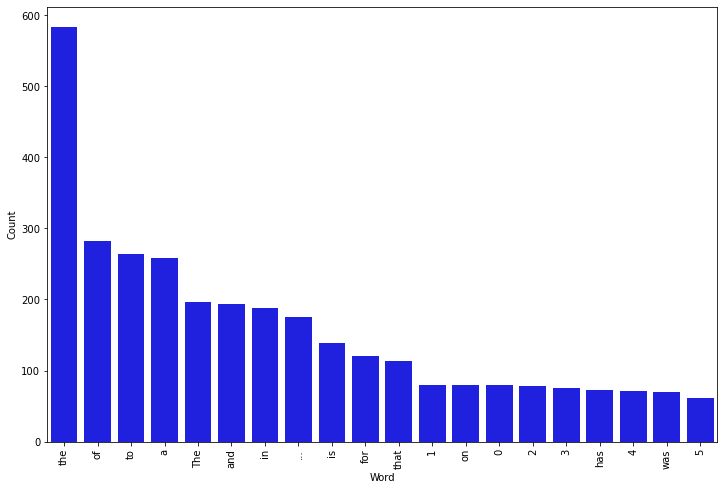

In [40]:
frequency(research_real, "text", 20)

## Data Cleaning

### Kaggle - Drop irrelevant columns 

In [41]:
kaggle_data.drop(['title', 'subject', 'date'],axis=1,inplace=True)

### Remove Stopwords and Punctuations

In [42]:

# def clean_data1(df, columns):
#     for i, col in enumerate(columns):
#         df[col] = df[col].apply(lambda text: clean_text1(text))

# ### Lemmatization OR Stemming
# # Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological 
# # analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary 
# # form of a word, which is known as the lemma.
        
# def clean_text1(text):
#     text = ''.join(char.lower() for char in text if char not in punct)
#     tokens = re.split('\W+', text)
#     text = ' '.join([lm.lemmatize(word) for word in tokens if word not in sw])
#     print(text)
# #     text = [(lm.lemmatize(word) and stemmer.stem(word)) for word in tokens if word not in sw]
#     return text


clean_data(kaggle_data, ["text"])
clean_data(research_data, ["text"])

In [43]:
# train_data, test_data, train_labels, test_labels = train_test_split(research_data['text'].values, (research_data.isFake).values, test_size=0.2, random_state=42, shuffle="false")

# from sklearn.metrics import plot_confusion_matrix
# from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.linear_model import LogisticRegression


# tfidf = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
# tfidf_ngrams = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000, lowercase=False)
    

# # Vectorizing and applying TF-IDF
# pipe = Pipeline([('tfidf', tfidf),
# #                  ('tfidf_ngrams', tfidf_ngrams),
#                  ('model', LogisticRegression())])
# # Fitting the model
# model = pipe.fit(train_data, train_labels)
# # Accuracy
# prediction = model.predict(test_data)
# print("accuracy: {}%".format(round(accuracy_score(test_labels, prediction)*100,2)))

# cm = metrics.confusion_matrix(test_labels, prediction)
# plot_confusion_matrix(cm, classes=['Fake', 'Real'])



## Combine both dataset

In [44]:
all_data = kaggle_data.append(research_data, ignore_index=True, sort=False)
all_data.head()

,text,isFake
0,huntington wva reuters west virginia governor ...,0
1,geneva reuters syria political opposition hope...,0
2,moscow reuters russian president vladimir puti...,0
3,president donald trump visited cia saturday ho...,1
4,folk fox news getting crazier minute minute ba...,1


### Data visualization after cleanup

isFake
0    21497
1    23571
Name: text, dtype: int64


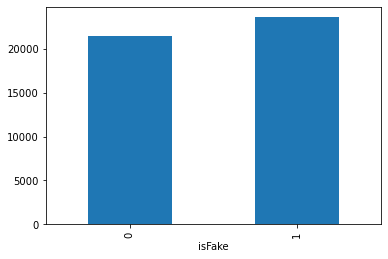

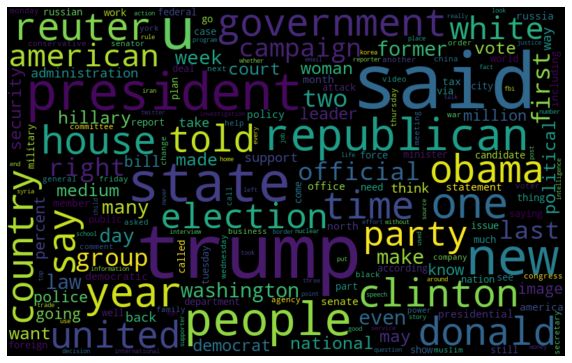

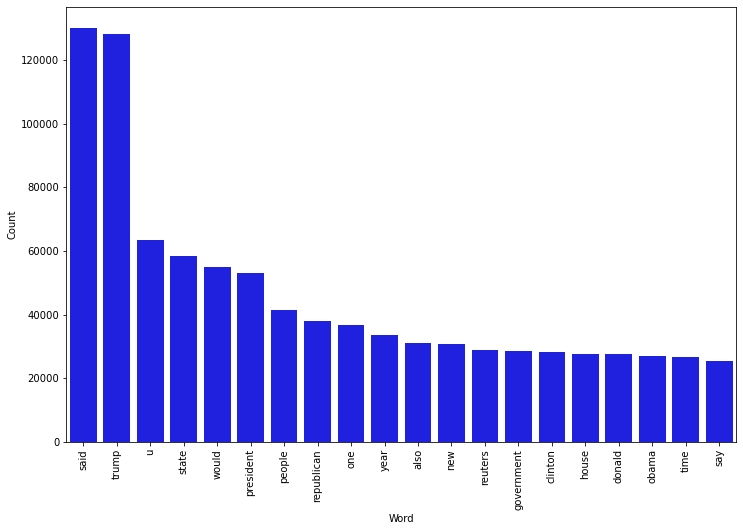

In [45]:
print(all_data.groupby(['isFake'])['text'].count())
all_data.groupby(['isFake'])['text'].count().plot(kind="bar")
plt.show()

word_cloud(all_data, "text")

frequency(all_data, "text", 20)

### Split to train, test

In [46]:
# train_data, test_data, train_labels, test_labels = split_data(kaggle_data, labels)
train_data, test_data, train_labels, test_labels = train_test_split(all_data['text'].values, all_data['isFake'].values, test_size=0.2, random_state=42, shuffle="false")

# print("X_train shape: {}".format(train_data))
# print("X_test shape: {}".format(test_data))
# print("y_train shape: {}".format(train_labels))
# print("y_test shape: {}".format(test_labels))


# Logistic regression:

In [47]:
import sklearn.metrics as metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import seaborn as sns

# tfidf = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
# tfidf_ngrams = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
    

# # Vectorizing and applying TF-IDF
# pipe = Pipeline([('tfidf', tfidf),
# #                  ('tfidf_ngrams', tfidf_ngrams),
#                  ('model', LogisticRegression())])

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])
# Fitting the model
model = pipe.fit(train_data, train_labels)
# Accuracy
prediction = model.predict(test_data)
print("accuracy: {}%".format(round(accuracy_score(test_labels, prediction)*100,2)))
cm = metrics.confusion_matrix(test_labels, prediction, labels=['FAKE','REAL'])

# plot_confusion_matrix(cm, test_data, test_labels,
#                          display_labels=['Fake', 'Real'],
#                          cmap=plt.cm.Blues)


accuracy: 98.62%


<AxesSubplot:>

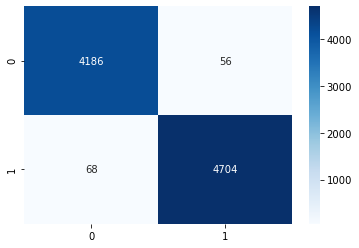

In [48]:
sns.heatmap(cm, annot=True,cmap='Blues', fmt='g')

## Decision Tree Classifier:

In [49]:
from sklearn.tree import DecisionTreeClassifier
# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(train_data, train_labels)
# Accuracy
prediction = model.predict(test_data)
print("accuracy: {}%".format(round(accuracy_score(test_labels, prediction)*100,2)))


cm = metrics.confusion_matrix(test_labels, prediction, labels=['FAKE','REAL'])
# plot_confusion_matrix(cm, test_data, test_labels,
#                          display_labels=['Fake', 'Real'],
#                          cmap=plt.cm.Blues)


accuracy: 99.38%


<AxesSubplot:>

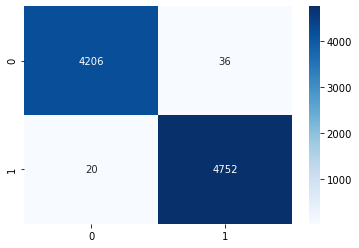

In [50]:
sns.heatmap(cm, annot=True,cmap='Blues', fmt='g')

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])
# Fitting the model
model = pipe.fit(train_data, train_labels)
# Accuracy
prediction = model.predict(test_data)
print("accuracy: {}%".format(round(accuracy_score(test_labels, prediction)*100,2)))

cm = metrics.confusion_matrix(test_labels, prediction, labels=['FAKE','REAL'])
# plot_confusion_matrix(cm, test_data, test_labels,
#                          display_labels=['Fake', 'Real'],
#                          cmap=plt.cm.Blues,
#                          normalize='true')


accuracy: 98.19%


<AxesSubplot:>

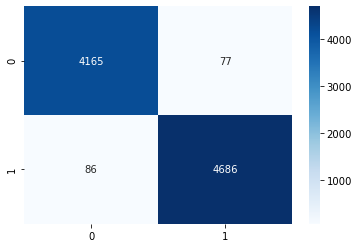

In [52]:
sns.heatmap(cm, annot=True,cmap='Blues', fmt='g')